# 1、常用数据分布

## 结合Scipy的统计函数来展示正态分布的概率密度函数、分布函数、分位数、随机数生成以及统计指标

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use(['science', 'ieee', 'grid', 'muted'])

### 概率密度函数 返回$N(\mu, \sigma^2)$的概率密度函数在x出的值

In [2]:
pdf = stats.norm.pdf([-0.67448975, 0, 0.67448975], loc = 0, scale = 1)
print('pdf: {}'.format(pdf))

pdf: [0.31777657 0.39894228 0.31777657]


### 概率分布函数 返回$N(\mu, \sigma^2)$的概率密度函数在 负无穷 到 $x$ 上的积分，也就是概率分布函数的值

In [3]:
cdf = stats.norm.cdf([-0.67448975, 0, 0.67448975], loc = 0, scale = 1)
print('cdf: {}'.format(cdf))

cdf: [0.25 0.5  0.75]


### 累计分布函数cdf的逆函数，相当于是求概率分布函数的分位数

In [4]:
ppf = stats.norm.ppf([0.25, 0.5, 0.75])
print('ppf: {}'.format(ppf))

ppf: [-0.67448975  0.          0.67448975]


### 使用ppf和np.linspace 生成数据，求pdf。绘制pdf曲线

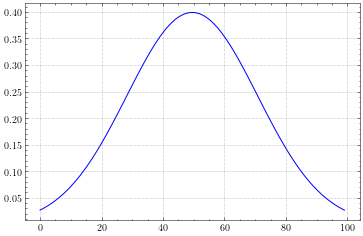

In [6]:
cdf_n = np.linspace(stats.norm.ppf(1e-2, loc = 0, scale = 1), stats.norm.ppf(0.99, loc = 0, scale = 1), 100)
plt.plot(stats.norm.pdf(cdf_n, loc = 0, scale = 1), 'b-', label = 'norm')

### 绘制cdf曲线

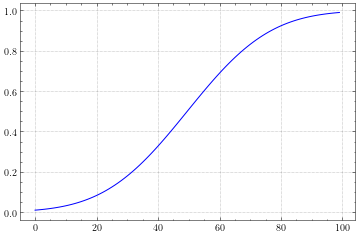

In [8]:
plt.plot(stats.norm.cdf(cdf_n, loc = 0, scale = 1), 'b-', label = 'norm')

### rvs 生成服从指定分布的随机数，设置随机种子random_state=1

In [12]:
rvs_n = stats.norm.rvs(loc = 0, scale = 1, size = 10000, random_state = 1)
print('rvs_n: {}'.format(rvs_n))
# describe 统计描述函数
describe = stats.describe(rvs_n)
print('describe: {}'.format(describe))

rvs_n: [ 1.62434536 -0.61175641 -0.52817175 ... -1.01414382 -0.06269623
 -1.43786989]
describe: DescribeResult(nobs=10000, minmax=(-3.656440099254795, 4.026849044547378), mean=0.00977265669910497, variance=0.9976729288445313, skewness=0.0249045712813166, kurtosis=0.028669537652855848)


# 2、scikit-learn 数据集生成接口

### 生成分类模型随机数据

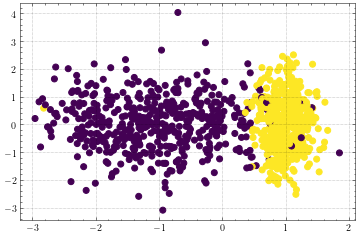

In [14]:
from sklearn.datasets import make_classification

# X为样本特征，Y为样本类别输出，共1000个样本，每个样本5个特征，输出有2个类别，没有冗余特征，每个类别一个簇
X, Y = make_classification(n_samples = 1000, n_features = 5, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1, n_classes = 2, random_state = 20)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)

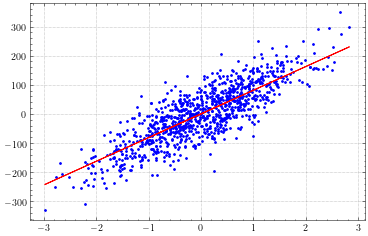

In [15]:
from sklearn.datasets import make_regression

# X为样本特征，Y为样本类别输出，共1000个样本，每个样本3个特征，返回回归系数
X, Y, coef = make_regression(n_samples = 1000, n_features = 3, noise = 10, coef = True, random_state = 20)
plt.scatter(X[:, 0], Y, c='b', s=3)
plt.plot(X[:, 0], X[:, 0] * coef[0], c='r')

### 聚类模型随机数据生成

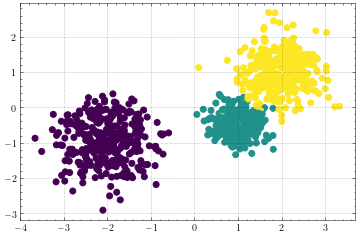

In [16]:
from sklearn.datasets import make_blobs

# X为样本特征，Y为样本类别输出，共1000个样本，每个样本2个特征，共3个簇，簇中心在[-1, -1], [1, 1], [2, 2], 簇方差分别为[0.4, 0.5, 0.2]
X, Y = make_blobs(n_samples = 1000, n_features = 5, centers = [[-2, -1], [1, -0.5], [2, 1]], cluster_std = [0.6, 0.3, 0.5], random_state = 20)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)